In [183]:
%matplotlib inline

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [185]:
# Matrix sizes
m0 = 1040
m1 = 4992
m2 = 10400

In [205]:
# Helper functions
comment_char = '#'

# Read cvs data files into dictionary of dataframes
def read_csv_data(filename_dict):
    df_dict = {}
    for key, fname in filename_dict.items():
        df_dict[key] = pd.read_csv(fname, delimiter='\t', comment=comment_char)
    return df_dict

# Average over ranks for dictionary of dataframes
def average_over_ranks(dfraw_dict):
    df_dict = {}
    for key, df in dfraw_dict.items():
        dftmp = df.groupby('blocksize').apply(lambda group: group.iloc[:, 2:].mean())
        # sort index for blocksizes
        index = dftmp.index.tolist()
        index = [eval(x) for x in index]
        index = sorted(index, reverse=True)
        index = [str(x) for x in index]
        index = pd.Index(index)
        dftmp = dftmp.reindex(index)
        df_dict[key] = dftmp
    return df_dict

# Find minimum time and corresponding row (blocksize) and col (process grid)
def find_min_time(dfavg_dict):
    for bench, df in dfavg_dict.items():
        min_time = df.min().min()
        min_col = df.min().idxmin()
        min_row = df[df[min_col] == min_time].index[0]
        print(f"bench: {bench}, min_time: {min_time:6.2f}, min_col: {min_col}, min_row: {min_row}")

# Plot data from dataframe dicts
def plot_dataframe_dict(df_dict, fig_title=None):
    # 
    plot_size = (4, 4)
    num_cols = 2
    num_plots = len(df_dict)
    num_rows = num_plots // num_cols + num_plots % num_cols
    # 
    xlabel = "Process grid"
    ylabel = "Time (s)"
    # fig_title = "PDSYEV, cedar, time vs gridshape, intel-threaded"

    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols*plot_size[0], num_rows*plot_size[1]))
    fig.suptitle(fig_title)
    axs = axs.flatten()
    
    for i, dfavg in enumerate(df_dict.items()):
        ax = axs[i]
        # 
        benchmark_name = dfavg[0].split('-')
        sys_name = benchmark_name[0]
        matrix_dim = benchmark_name[1]
        nnodes = benchmark_name[2][1:]
        nprocs = benchmark_name[3][2:]
        nthreads = benchmark_name[4][2:]
        ax_title = f"sys: {sys_name}, m: {matrix_dim} \n nnodes: {nnodes}, nprocs: {nprocs}, nthreads: {nthreads}"
        # 
        df = dfavg[1]    
        df.T.plot(ax=ax, marker='o', rot=45)
        # 
        xticks = range(df.shape[1])
        xticks_label = df.columns.tolist()    
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticks_label)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_title(ax_title)
        ax.grid()
    plt.tight_layout()      
    

# intel-threaded

## Environment

```
intel/2020.1.217  
intelmpi/2019.7.217
imkl/2022.1.0
python/3.8
mpi4py/3.0.3
```

## Benchmarks summary

- Best process grid and block sizes are independet from the global matrix size
- Best overl timings
    - Block sizes: (16x16) and (32x32)
    - Process grids
        - 48 processes:  
        - 96 processes: (8x12) and (12x8)
        - 192 processes: 

In [246]:
# Cluster information
cpulog = 'intel-threaded/bin/scalapack/pdsyev/tvsgs-si-4992-n2-np96-nt1/lscpu.log'
with open(cpulog) as f:
    cpuinfo = f.read()
# print(cpuinfo)

In [294]:
# Data file names
fname_intel_threaded = {
    'si-4992-n2-np96-nt1': 'intel-threaded/bin/scalapack/pdsyev/tvsgs-si-4992-n2-np96-nt1/time_vs_gridshape.csv',
    'si-4992-n1-np48-nt1': 'intel-threaded/bin/scalapack/pdsyev/tvsgs-si-4992-n1-np48-nt1/time_vs_gridshape.csv',
    'si-10400-n2-np96-nt1': 'intel-threaded/bin/scalapack/pdsyev/tvsgs-si-10400-n2-np96-nt1/time_vs_gridshape.csv',
    'si-10400-n3-np144-nt1': 'intel-threaded/bin/scalapack/pdsyev/tvsgs-si-10400-n3-np144-nt1/time_vs_gridshape.csv',
    'si-10400-n4-np192-nt1': 'intel-threaded/bin/scalapack/pdsyev/tvsgs-si-10400-n4-np192-nt1/time_vs_gridshape.csv'

}

In [295]:
dfraw_intel_threaded = read_csv_data(fname_intel_threaded)
dfavg_intel_threaded = average_over_ranks(dfraw_intel_threaded)

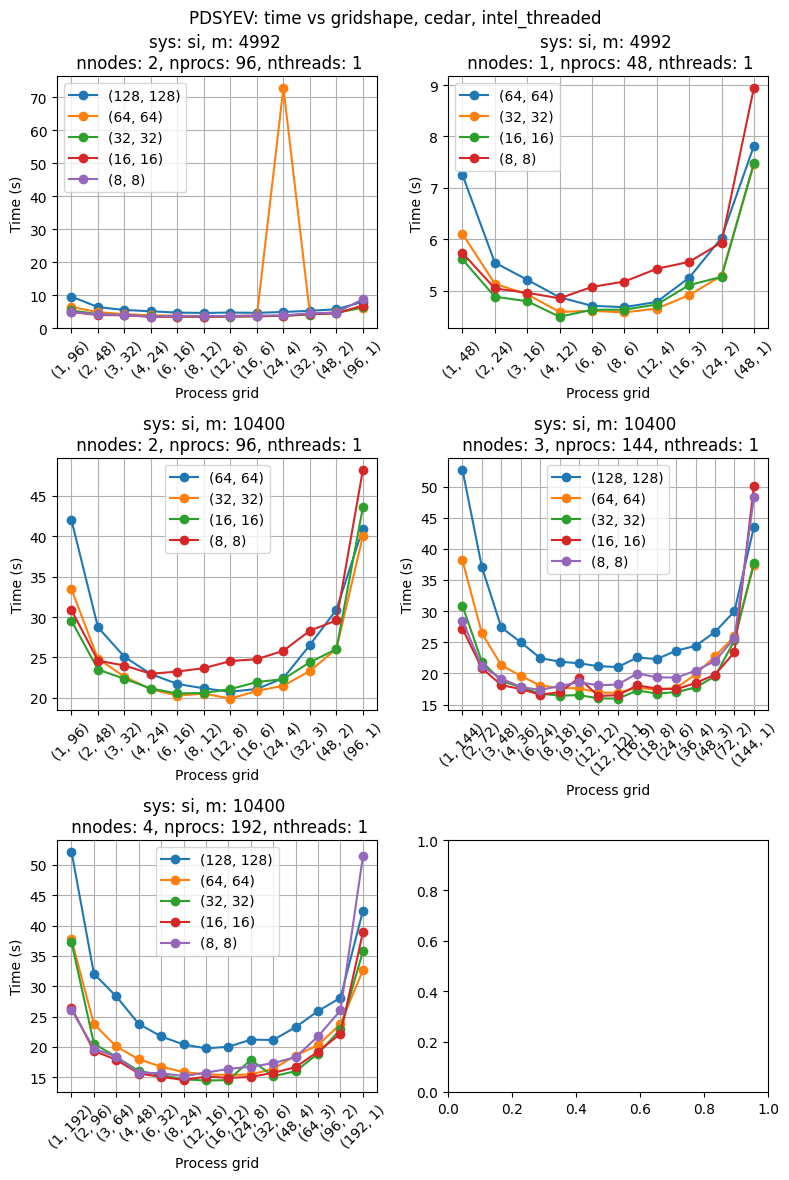

In [297]:
fig_title = "PDSYEV: time vs gridshape, cedar, intel_threaded"
plot_dataframe_dict(dfavg_intel_threaded, fig_title=fig_title)

# gcc-ompi-sca-oblas-o2

## Environment

```
gcc/11.3.0
openmpi/4.1.4
mpi4py/3.1.4
python/3.11.2
```

## Benchmarks summary

- Best process grid and block sizes are independet from the global matrix size
- Best overal timing
    - Block sizes: (8x8) and (16x16)
    - Process grids
        - 48 processes:  
        - 96 processes: (8x12) and (12x8)
        - 192 processes: (12x16) and (16x12)


In [298]:
# Cluster information
cpulog = 'gcc-ompi-sca-oblas-o2/bin/scalapack/pdsyev/tvsgs-si-10400-n4-np192-nt1/lscpu.log'
with open(cpulog) as f:
    cpuinfo = f.read()
# print(cpuinfo)

In [299]:
# Data file names
fname_gcc_ompi_sca_oblas_o2 = {
'si-10400-n4-np192-nt1': 'gcc-ompi-sca-oblas-o2/bin/scalapack/pdsyev/tvsgs-si-10400-n4-np192-nt1/time_vs_gridshape.csv',
'si-4992-n2-np24-nt4': 'gcc-ompi-sca-oblas-o2/bin/scalapack/pdsyev/tvsgs-si-4992-n2-np24-nt4/time_vs_gridshape.csv',
'si-4992-n2-np48-nt2': 'gcc-ompi-sca-oblas-o2/bin/scalapack/pdsyev/tvsgs-si-4992-n2-np48-nt2/time_vs_gridshape.csv',
'si-4992-n2-np96-nt1': 'gcc-ompi-sca-oblas-o2/bin/scalapack/pdsyev/tvsgs-si-4992-n2-np96-nt1/time_vs_gridshape.csv',
'si-4992-n3-np144-nt1': 'gcc-ompi-sca-oblas-o2/bin/scalapack/pdsyev/tvsgs-si-4992-n3-np144-nt1/time_vs_gridshape.csv',
'si-4992-n4-np192-nt1': 'gcc-ompi-sca-oblas-o2/bin/scalapack/pdsyev/tvsgs-si-4992-n4-np192-nt1/time_vs_gridshape.csv',
}

In [300]:
# Read data into dataframes and average over ranks
dfraw_gcc_ompi_sca_oblas_o2 = read_csv_data(fname_gcc_ompi_sca_oblas_o2)
dfavg_gcc_ompi_sca_oblas_o2 = average_over_ranks(dfraw_gcc_ompi_sca_oblas_o2)

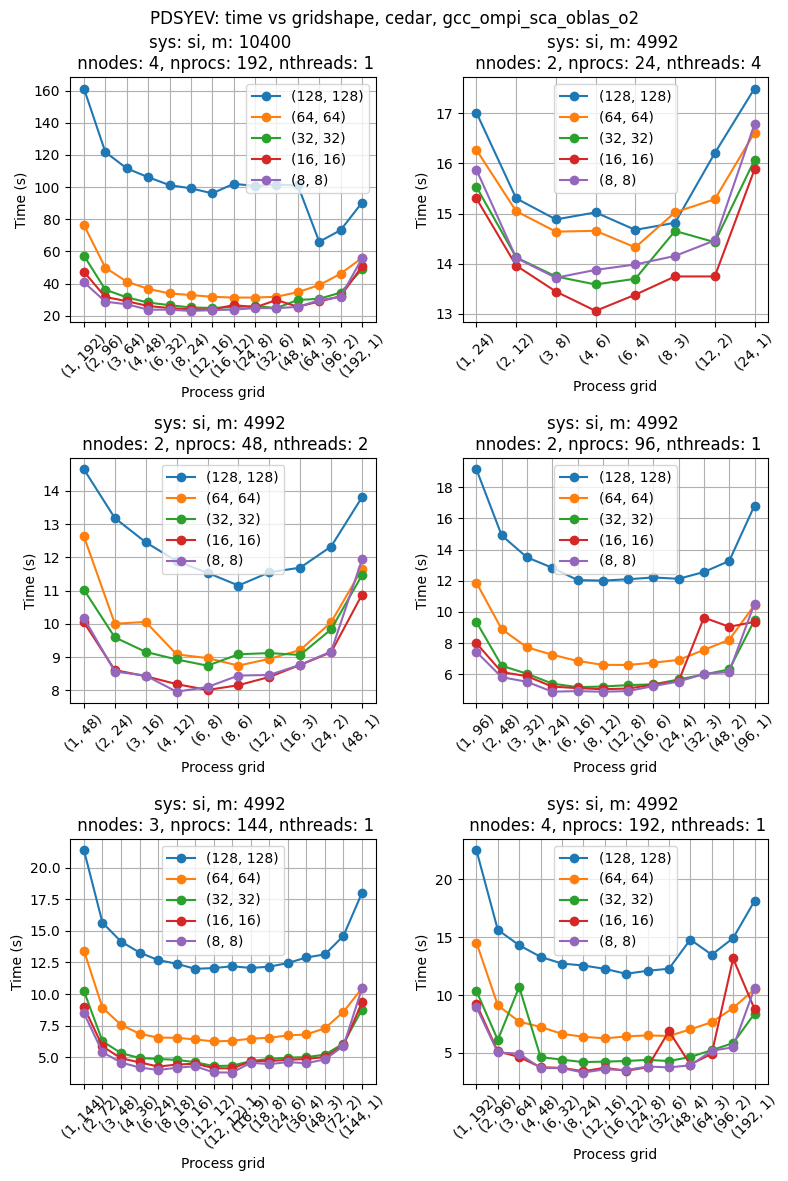

In [301]:
# Plot time vs grid shape for a fixed block size
fig_title = "PDSYEV: time vs gridshape, cedar, gcc_ompi_sca_oblas_o2"
plot_dataframe_dict(dfavg_gcc_ompi_sca_oblas_o2, fig_title=fig_title)

# gcc-ompi-sca-oblas-o2-native

## Environment

```
gcc/11.3.0
openmpi/4.1.4
mpi4py/3.1.4
python/3.11.2
```

## Benchmarks summary

- Best process grid and block sizes are independet from the global matrix size
- Best overal timing
    - Block sizes: (8x8) and (16x16)
    - Process grids
        - 48 processes:  
        - 96 processes: (8x12) and (12x8)
        - 192 processes: (12x16) and (16x12)

In [302]:
# Cluster information
cpulog = 'gcc-ompi-sca-oblas-o2-native/bin/scalapack/pdsyev/tvsgs-si-10400-n4-np192-nt1/lscpu.log'
with open(cpulog) as f:
    cpuinfo = f.read()
# print(cpuinfo)

In [303]:
# Data file names
fname_gcc_ompi_sca_oblas_o2_native = {
'si-10400-n4-np192-nt1' : 'gcc-ompi-sca-oblas-o2-native/bin/scalapack/pdsyev/tvsgs-si-10400-n4-np192-nt1/time_vs_gridshape.csv',
'si-4992-n2-np96-nt1' : 'gcc-ompi-sca-oblas-o2-native/bin/scalapack/pdsyev/tvsgs-si-4992-n2-np96-nt1/time_vs_gridshape.csv',
'si-4992-n4-np192-nt1' : 'gcc-ompi-sca-oblas-o2-native/bin/scalapack/pdsyev/tvsgs-si-4992-n4-np192-nt1/time_vs_gridshape.csv'
}

In [304]:
# Read data into dataframes and average over ranks
dfraw_gcc_ompi_sca_oblas_o2_native = read_csv_data(fname_gcc_ompi_sca_oblas_o2_native)
dfavg_gcc_ompi_sca_oblas_o2_native = average_over_ranks(dfraw_gcc_ompi_sca_oblas_o2_native)

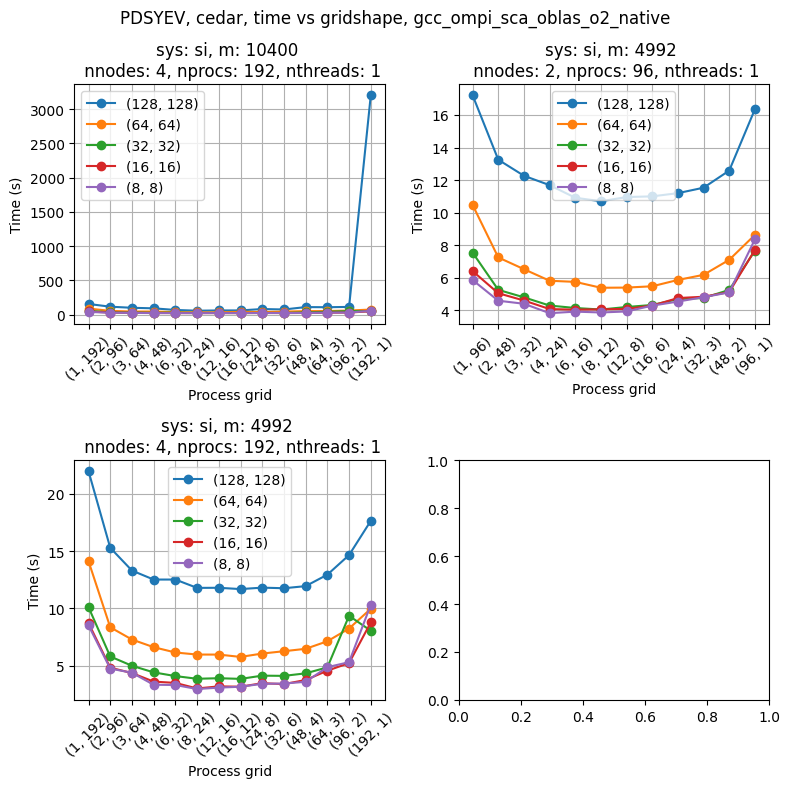

In [305]:
# Plot time vs grid shape for a fixed block size
fig_title = "PDSYEV, cedar, time vs gridshape, gcc_ompi_sca_oblas_o2_native"
plot_dataframe_dict(dfavg_gcc_ompi_sca_oblas_o2_native, fig_title=fig_title)

# Timing comparision between benchmarks

In [306]:
find_min_time(dfavg_intel_threaded)

bench: si-4992-n2-np96-nt1, min_time:   3.47, min_col: (8, 12), min_row: (16, 16)
bench: si-4992-n1-np48-nt1, min_time:   4.49, min_col: (4, 12), min_row: (16, 16)
bench: si-10400-n2-np96-nt1, min_time:  19.90, min_col: (12, 8), min_row: (32, 32)
bench: si-10400-n3-np144-nt1, min_time:  15.95, min_col: (12, 12).1, min_row: (32, 32)
bench: si-10400-n4-np192-nt1, min_time:  14.48, min_col: (12, 16), min_row: (32, 32)


In [307]:
find_min_time(dfavg_gcc_ompi_sca_oblas_o2)

bench: si-10400-n4-np192-nt1, min_time:  22.96, min_col: (8, 24), min_row: (8, 8)
bench: si-4992-n2-np24-nt4, min_time:  13.06, min_col: (4, 6), min_row: (16, 16)
bench: si-4992-n2-np48-nt2, min_time:   7.96, min_col: (4, 12), min_row: (8, 8)
bench: si-4992-n2-np96-nt1, min_time:   4.89, min_col: (8, 12), min_row: (8, 8)
bench: si-4992-n3-np144-nt1, min_time:   3.79, min_col: (12, 12).1, min_row: (8, 8)
bench: si-4992-n4-np192-nt1, min_time:   3.31, min_col: (8, 24), min_row: (8, 8)


In [308]:
find_min_time(dfavg_gcc_ompi_sca_oblas_o2_native)

bench: si-10400-n4-np192-nt1, min_time:  21.23, min_col: (8, 24), min_row: (8, 8)
bench: si-4992-n2-np96-nt1, min_time:   3.84, min_col: (4, 24), min_row: (8, 8)
bench: si-4992-n4-np192-nt1, min_time:   2.96, min_col: (8, 24), min_row: (8, 8)


## Benchmark: 4992-n96-nt1

- Best Process grid: (8x12)
- Rankings overal (base-line O2)
    1. intel-threaded: between 20% to 40% speedup
    2. O2-native: up to 20% speedup
    3. O2

In [309]:
# 4992-n96-nt1
bench_item = 'si-4992-n2-np96-nt1'
procgrid = '(8, 12)'
df1 = dfavg_gcc_ompi_sca_oblas_o2[bench_item][procgrid]
df1.name = 'O2'
df2 = dfavg_gcc_ompi_sca_oblas_o2_native[bench_item][procgrid]
df2.name = 'O2-native'
df3 = dfavg_intel_threaded[bench_item][procgrid]
df3.name = 'intel-threaded'
df = pd.concat([df1, df2, df3], axis=1)

df_speedup = pd.DataFrame()
df_speedup['O2-native'] = 100 - df['O2-native'] / df['O2'] * 100
df_speedup['intel-threaded'] = 100 - df['intel-threaded'] / df['O2'] * 100

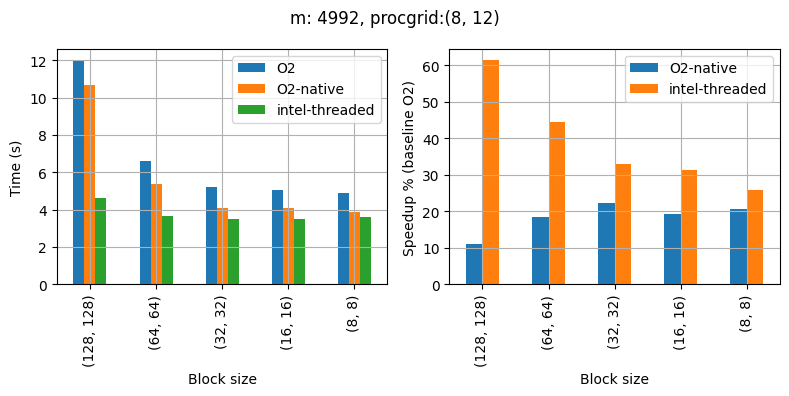

In [310]:
fig_title = f"m: 4992, procgrid:{procgrid}"
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle(fig_title)

# Timings vs blocksize 
ax = axs[0]
df.plot(kind='bar', ax=ax)
ax.grid()
ax.set_xlabel('Block size')
ax.set_ylabel('Time (s)')
# Speedup vs blocksize
ax = axs[1]
df_speedup.plot(ax=ax, kind='bar')
ax.grid()
ax.set_xlabel('Block size')
ax.set_ylabel('Speedup % (baseline O2)')

plt.tight_layout()

## Benchmark: 10400-n192-nt1

- Best Process grid: (16x12)
- Rankings overal (base-line O2)
    1. intel-threaded: between 25% to 40% speedup
    2. O2-native: up to 20% speedup
    3. O2

In [314]:
# 10400-n192-nt1
bench_item = 'si-10400-n4-np192-nt1'
procgrid = '(16, 12)'
df1 = dfavg_gcc_ompi_sca_oblas_o2[bench_item][procgrid]
df1.name = 'O2'
df2 = dfavg_gcc_ompi_sca_oblas_o2_native[bench_item][procgrid]
df2.name = 'O2-native'
df3 = dfavg_intel_threaded[bench_item][procgrid]
df3.name = 'intel-threaded'
df = pd.concat([df1, df2, df3], axis=1)

df_speedup = pd.DataFrame()
df_speedup['O2-native'] = 100 - df['O2-native'] / df['O2'] * 100
df_speedup['intel-threaded'] = 100 - df['intel-threaded'] / df['O2'] * 100


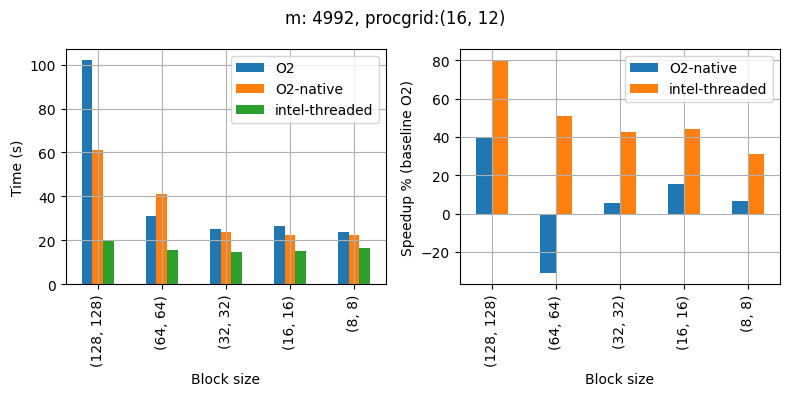

In [317]:
fig_title = f"m: 4992, procgrid:{procgrid}"
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle(fig_title)

# Timings vs blocksize 
ax = axs[0]
df.plot(kind='bar', ax=ax)
ax.grid()
ax.set_xlabel('Block size')
ax.set_ylabel('Time (s)')
# Speedup vs blocksize
ax = axs[1]
df_speedup.plot(ax=ax, kind='bar')
ax.grid()
ax.set_xlabel('Block size')
ax.set_ylabel('Speedup % (baseline O2)')

plt.tight_layout()

In [331]:
from pathlib import Path
datadir = Path('intel-threaded/bin/scalapack/pdsyev')

benchs = sorted([x for x in datadir.iterdir() if x.is_dir()])
for x in benchs:
    print(x)
    for f in x.iterdir():
        if f.is_file():
            print(f)

intel-threaded/bin/scalapack/pdsyev/tvsgs-si-10400-n2-np96-nt1
intel-threaded/bin/scalapack/pdsyev/tvsgs-si-10400-n2-np96-nt1/time_vs_gridshape.csv
intel-threaded/bin/scalapack/pdsyev/tvsgs-si-10400-n2-np96-nt1/time_vs_gridshape.svg
intel-threaded/bin/scalapack/pdsyev/tvsgs-si-10400-n2-np96-nt1/spy_arrays.svg
intel-threaded/bin/scalapack/pdsyev/tvsgs-si-10400-n3-np144-nt1
intel-threaded/bin/scalapack/pdsyev/tvsgs-si-10400-n3-np144-nt1/time_vs_gridshape.csv
intel-threaded/bin/scalapack/pdsyev/tvsgs-si-10400-n3-np144-nt1/time_vs_gridshape.svg
intel-threaded/bin/scalapack/pdsyev/tvsgs-si-10400-n3-np144-nt1/spy_arrays.svg
intel-threaded/bin/scalapack/pdsyev/tvsgs-si-10400-n3-np144-nt1/log.out
intel-threaded/bin/scalapack/pdsyev/tvsgs-si-10400-n3-np144-nt1/lscpu.log
intel-threaded/bin/scalapack/pdsyev/tvsgs-si-10400-n4-np192-nt1
intel-threaded/bin/scalapack/pdsyev/tvsgs-si-10400-n4-np192-nt1/time_vs_gridshape.csv
intel-threaded/bin/scalapack/pdsyev/tvsgs-si-10400-n4-np192-nt1/time_vs_gridsh